In [1]:
import thinkdsp
import thinkplot
import thinkstats2

import numpy as np


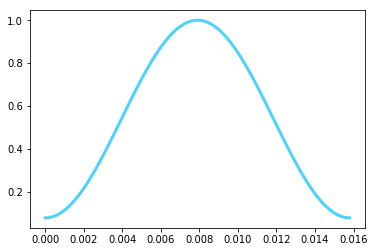

In [2]:
hamming = thinkdsp.Wave( ys=np.hamming(80), ts=np.arange(80))
hamming.__init__(ys=hamming.ys, framerate=5000)
hamming.plot()

In [108]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline
beta = 0.2
i = 1
cut_dict = {}
ample_dict = {}
while True:
 time_start=time.time()   
 try:
   plt.clf()
   #plt.plot(pd.Series(data=np.random.randn(100), index=i))
   ample = np.genfromtxt('五指张100.txt',dtype=None, filling_values = int)
   if ample.shape==(6,5000):
       ys_0 = ample[5]
       ts = np.arange((len(ys_0)))
       wave = thinkdsp.Wave(framerate=5000, ts=ts, ys=ys_0)
       wave.unbias()
       wave.ys=wave.ys**2
       convolve_0 = wave.convolve(hamming)
       cut = thinkdsp.Wave(framerate=5000, ys=convolve_0.ys)
     
       
       cut.ts =convolve_0.ts[convolve_0.ys > beta]
       if cut.ts.shape>(0,)and cut.ts.shape<(401,) :

           cut.ys =convolve_0.ys[convolve_0.ys > beta]
           cut.plot()
           cut_dict["cut_"+str(i)]=cut
           ample_dict["ample_"+str(i)] = ample
           ample_0 = ample[:,int(cut.ts[0]*5000):int(cut.ts[0]*5000)+400]
           if  ample_0.shape[1] < 400:
                    ample_0 = ample[:,-401:-1]
           np.savetxt('画圈\画圈_'+str(i)+'.txt', ample_0, fmt = '%g', newline='\n')
           i=i+1
       if cut.ts.shape>(400,) :
           cut.ts = convolve_0.ts[convolve_0.ys > np.max(convolve_0.ys)/8]
           if cut.ts.shape>(0,)and cut.ts.shape<(401,) :
              cut.ys =convolve_0.ys[convolve_0.ys > np.max(convolve_0.ys)/8]
              cut.plot()
              cut_dict["cut_"+str(i)]=cut
              ample_dict["ample_"+str(i)] = ample
              ample_0 = ample[:,int(cut.ts[0]*5000):int(cut.ts[0]*5000)+400]
              if  ample_0.shape[1] < 400:
                    ample_0 = ample[:,-401:-1]
              np.savetxt('画圈\画圈_'+str(i)+'.txt', ample_0, fmt = '%g', newline='\n')
              i=i+1
           if cut.ts.shape>(400,):
              cut.ts = convolve_0.ts[convolve_0.ys > np.max(convolve_0.ys)/5]
              if cut.ts.shape>(0,)and cut.ts.shape<(401,) :
                 cut.ys =convolve_0.ys[convolve_0.ys >np.max(convolve_0.ys)/5]
                 cut.plot()
                 cut_dict["cut_"+str(i)]=cut
                 ample_dict["ample_"+str(i)] = ample
                 ample_0 = ample[:,int(cut.ts[0]*5000):int(cut.ts[0]*5000)+400]
                 if  ample_0.shape[1] < 400:
                    ample_0 = ample[:,-401:-1]
                 np.savetxt('画圈\画圈_'+str(i)+'.txt', ample_0, fmt = '%g', newline='\n')
                 i=i+1
      
   display.display(plt.gcf())
   display.clear_output(wait=True)
   time.sleep(0.75)
   time_end=time.time()

   print('totally cost',time_end-time_start)
   print('i = ',i)
 except KeyboardInterrupt:
   break                              

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pylab as plt
from IPython import display
%matplotlib inline
i = 1
while True: 
    plt.clf()
    ys = np.loadtxt("数据集\向左\向左_"+str(i)+".txt") 
    ys_0 = ys[1]
    ts = np.arange((len(ys_0)))
    wave = thinkdsp.Wave(framerate=400, ts=ts, ys=ys_0)
    wave.__init__(framerate=400, ys= ys_0)
    wave.plot()
    '''
    spectrogram = wave.make_spectrogram(seg_length = 64)
    spectrogram.plot()
    
    spectrum = wave.make_spectrum()
    spectrum.low_pass(cutoff=20)
    spectrum.plot()
    '''
    display.display(plt.gcf())
    display.clear_output(wait=True)
    i += 1


OSError: 数据集\向左\向左_141.txt not found.

<Figure size 432x288 with 0 Axes>

In [33]:
spectrogram.spec_map

{0.15875: <thinkdsp.Spectrum at 0x22b7cf470b8>,
 0.31875: <thinkdsp.Spectrum at 0x22b7cf73128>,
 0.47875: <thinkdsp.Spectrum at 0x22b7ceb4828>,
 0.6387499999999999: <thinkdsp.Spectrum at 0x22b7ceb43c8>,
 0.7987500000000001: <thinkdsp.Spectrum at 0x22b7ceb4eb8>,
 0.95875: <thinkdsp.Spectrum at 0x22b7ceb4780>,
 1.11875: <thinkdsp.Spectrum at 0x22b7ceb40f0>,
 1.27875: <thinkdsp.Spectrum at 0x22b7ceb4438>}

In [117]:
cut_dict["cut_8"].ts[0]*5000

2996.0

In [104]:
ample_dict["ample_5"].shape

(6, 5000)

In [107]:
ample_dict["ample_5"][:,3716:4116].shape

(6, 400)

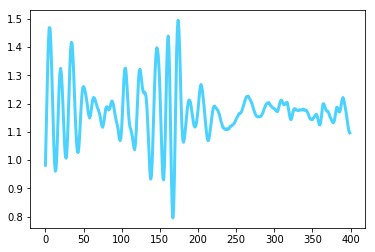

In [74]:
ys_0 = ample_dict["ample_5"][:,1463:1863][0]
ts = np.arange((len(ys_0)))
wave = thinkdsp.Wave(framerate=5000, ts=ts, ys=ys_0)
wave.plot()

In [4]:
import tensorflow as tf
with tf.Session() as sess:
  new_saver = tf.train.import_meta_graph('saved_model/model.ckpt.meta')
  new_saver.restore(sess, tf.train.latest_checkpoint('saved_model'))
  feed_dict = {x : np.loadtxt('响指/响指_1.txt').reshape(-1,2400), 
               keep_prob : 1}
  print(sess.run(y_conv, feed_dict))

NameError: name 'core' is not defined

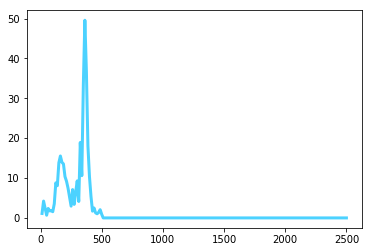

In [28]:
spectrum_.low_pass(500)
spectrum_.plot()

In [41]:
spectrum_.fs.shape

(200,)

In [111]:
#coding=utf-8
#!/usr/bin/python
import os
def open_app(app_dir):
    os.startfile(app_dir)
if __name__ == "__main__":
    app_dir = r'C:\Users\123\Desktop\第三章——高频小信号放大器.ppt'
    open_app(app_dir)

In [6]:
 ample = np.genfromtxt('五指张100.txt',dtype=None, filling_values = int)

In [7]:
ample.shape

(6, 500)

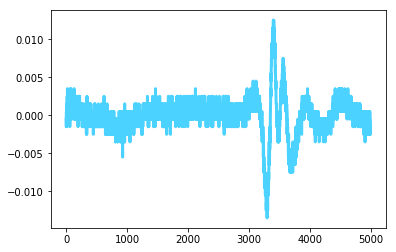

In [23]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline
beta = 0.2
i = 1
cut_dict = {}
ample_dict = {}
wave
hamming = thinkdsp.Wave( ys=np.hamming(200), ts=np.arange(200))
hamming.__init__(ys=hamming.ys, framerate=2500)
hamming.plot()
while True:
 time_start=time.time()   
 try:
   plt.clf()
   #plt.plot(pd.Series(data=np.random.randn(100), index=i))
   ample = np.genfromtxt('五指张100.txt',dtype=None, filling_values = int)
   if ample.shape==(6,5000):
       ys = {"ys_"+str(n): ample[n] for n in range(6)}
       ts = np.arange(5000)
       wave_0 = thinkdsp.Wave(framerate=2500, ts=ts, ys=ys["ys_0"])
       wave_1 = thinkdsp.Wave(framerate=2500, ts=ts, ys=ys["ys_1"])
       wave_2 = thinkdsp.Wave(framerate=2500, ts=ts, ys=ys["ys_2"])
       wave_3 = thinkdsp.Wave(framerate=5000, ts=ts, ys=ys["ys_3"])
       wave_4 = thinkdsp.Wave(framerate=5000, ts=ts, ys=ys["ys_4"])
       wave_5 = thinkdsp.Wave(framerate=5000, ts=ts, ys=ys["ys_5"])
       wave_0.unbias()
       wave_1.unbias()
       wave_2.unbias()
       wave_3.unbias()
       wave_4.unbias()
       wave_5.unbias()
       wave = np.matrix([wave_0.ys,wave_1.ys, wave_2.ys,wave_3.ys,wave_4.ys,wave_5.ys])
       p_0 = thinkdsp.Wave(framerate=2500, ts=ts, ys=wave_0.ys**2)
       p_1 = thinkdsp.Wave(framerate=5000, ts=ts, ys=wave_1.ys**2)
       p_2 = thinkdsp.Wave(framerate=5000, ts=ts, ys=wave_2.ys**2)
       wave_0.plot()
       convolve_0 = p_0.convolve(hamming)
       #convolve_0.plot()
       '''  
       if np.max([p_0.convolve(hamming).ys,p_1.convolve(hamming).ys,p_2.convolve(hamming).ys])>0.4 :
           wave_5.plot()
           np.savetxt('五指伸开\五指伸开_'+str(i)+'.txt', wave, fmt = '%g')
           i += 1
      ''' 
   display.display(plt.gcf())
   display.clear_output(wait=True)
   time.sleep(1.6)
   time_end=time.time()

   print('totally cost',time_end-time_start)
   print('i = ',i)
 except KeyboardInterrupt:
   break                              

In [139]:
a = np.loadtxt('向左\向左_10.txt')
a.shape

(6, 600)

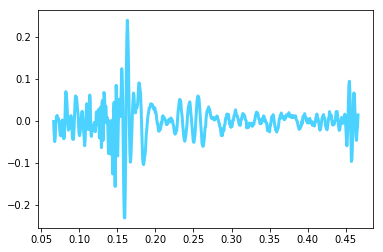

In [307]:
a = np.loadtxt('向左.txt',skiprows=1)
frm = 1500

wave = thinkdsp.Wave(framerate=frm,ts=np.arange((len(a))),ys=a[:,3])
wave.__init__(framerate=frm, ys=wave.ys)
wave.unbias()

power = thinkdsp.Wave(framerate=frm, ys=wave.ys**2, ts=wave.ts)

hamming = thinkdsp.Wave( ys=np.hamming(400), ts=np.arange(400))
hamming.__init__(ys=hamming.ys, framerate=frm)
convolve = power.convolve(hamming)

beta = 0.35
cut = thinkdsp.Wave(framerate=frm, ys=convolve_0.ys)
cut.ts = convolve.ts[convolve.ys > beta]
cut.ys = convolve.ys[convolve.ys > beta]

segment = thinkdsp.Wave(framerate=2500,ys=cut.ys)
segment.ts = cut.ts[0:1000]
segment.ys = cut.ys[0:1000]

seg = thinkdsp.Wave(framerate=2500, ys=wave.ys)
seg.ts = wave.ts[int(cut.ts[0]*1500)-200:int(cut.ts[0]*1500)+400]
seg.ys = wave.ys[int(cut.ts[0]*1500)-200:int(cut.ts[0]*1500)+400]
seg.plot()

In [309]:
seg.ts.shape[0]

600

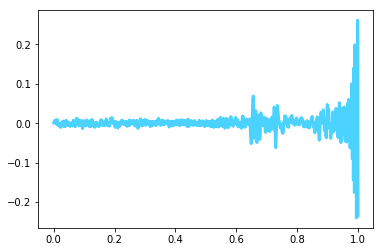

In [257]:
wave = thinkdsp.Wave(framerate=frm,ts=np.arange((len(a))),ys=a[:,3])
wave.__init__(framerate=frm, ys=wave.ys)
wave.unbias()
wave.plot()

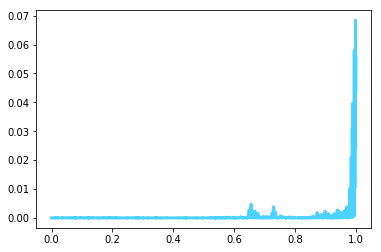

In [289]:
power = thinkdsp.Wave(framerate=frm, ys=wave.ys**2, ts=wave.ts)
power.plot()

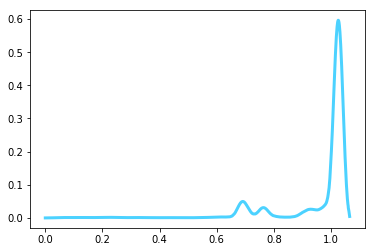

In [290]:
hamming = thinkdsp.Wave( ys=np.hamming(100), ts=np.arange(100))
hamming.__init__(ys=hamming.ys, framerate=frm)
convolve = power.convolve(hamming)

convolve.plot()

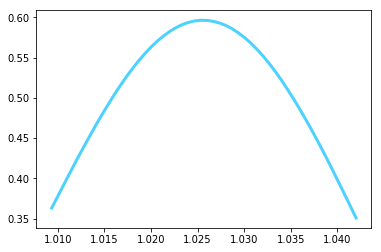

In [291]:
beta = 0.35
cut = thinkdsp.Wave(framerate=frm, ys=convolve_0.ys)
cut.ts = convolve.ts[convolve.ys > beta]
cut.ys = convolve.ys[convolve.ys > beta]
cut.plot()

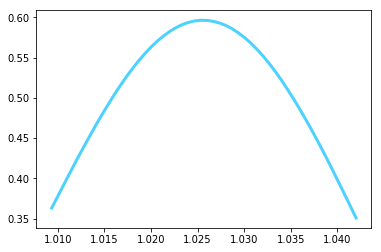

In [292]:
segment = thinkdsp.Wave(framerate=2500,ys=cut.ys)
segment.ts = cut.ts[0:600]
segment.ys = cut.ys[0:600]
segment.plot()

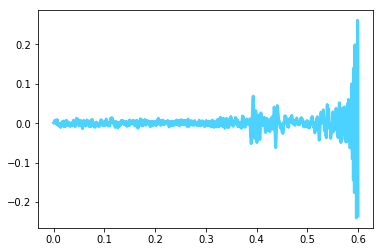

In [293]:
seg = thinkdsp.Wave(framerate=2500, ys=wave.ys)
seg.plot()

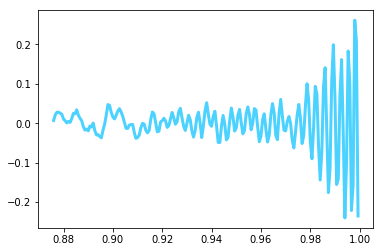

In [299]:
seg.ts = wave.ts[int(cut.ts[0]*1500)-200:int(cut.ts[0]*1500)+400]
seg.ys = wave.ys[int(cut.ts[0]*1500)-200:int(cut.ts[0]*1500)+400]
seg.plot()

In [300]:
int(cut.ts[0]*1500)

1514

In [301]:
seg.ys.shape

(186,)

In [302]:
seg.ys[0:10000000].shape

(186,)

In [303]:
seg.ts.shape

(186,)